# HepMC3 Interface: IO and visualization

chromo uses the pyhepmc library for event IO and visualization. Visualization of the event is useful to understand the particle history. Not all generators produce a history. Here we generate an event with Pythia6 which has full history.

For the visualization to work, the optional package graphviz is required.

In [1]:
import chromo.models as im
from chromo.kinematics import CenterOfMass
from chromo.constants import GeV
from chromo.util import pdg2name

In [2]:
evt_kin = CenterOfMass(50 * GeV, "p", "p")

model = im.Pythia8(evt_kin, seed=1)

# generate one event
for event in model(1):
    pass


 *------------------------------------------------------------------------------------* 
 |                                                                                    | 
 |  *------------------------------------------------------------------------------*  | 
 |  |                                                                              |  | 
 |  |                                                                              |  | 
 |  |   PPP   Y   Y  TTTTT  H   H  III    A      Welcome to the Lund Monte Carlo!  |  | 
 |  |   P  P   Y Y     T    H   H   I    A A     This is PYTHIA version 8.308      |  | 
 |  |   PPP     Y      T    HHHHH   I   AAAAA    Last date of change: 16 Nov 2022  |  | 
 |  |   P       Y      T    H   H   I   A   A                                      |  | 
 |  |   P       Y      T    H   H  III  A   A    Now is 29 Jun 2023 at 17:33:54    |  | 
 |  |                                                                              |  | 
 |  |   Program docu

To get a look at the event, we can `print` it, but the output is a bit confusing. chromo gives access to the Fortran HepEvt record, which is a very compact and efficient format, but it is not easy to see what is going on.

In [3]:
print(event)

PYTHIA8Event(generator=('Pythia', '8.308'), kin=CenterOfMass(frame=<EventFrame.CENTER_OF_MASS: 1>, p1=<PDGID: 2212>, p2=<PDGID: 2212>, ecm=50.0, plab=1331.2975532609246, elab=1331.2978838986546, ekin=1330.3596118104947, beams=(array([ 0.        ,  0.        , 24.98238671, 25.        ]), array([  0.        ,   0.        , -24.98238671,  25.        ])), _gamma_cm=26.64472311973629, _betagamma_cm=26.62595106521849), nevent=1, impact_parameter=nan, n_wounded=(0, 0), pid=array([2212, 2212,    2,    1,    2,    1,    2,    1,    2,    1, 2101,
       2101,    2,   -1,  321, -311, -211,  213, 2112,    2, 2101,  211,
        311, -321,  211, 2112,  130,  211,  111,  310,   22,   22],
      dtype=int32), status=array([ 4,  4, 21, 21, 23, 23, 61, 61, 62, 62, 63, 63, 63, 63,  1,  2,  1,
        2,  1, 71, 71,  1,  2,  1,  1,  1,  1,  1,  2,  1,  1,  1],
      dtype=int32), charge=array([ 1.        ,  1.        ,  0.6666667 , -0.33333334,  0.6666667 ,
       -0.33333334,  0.6666667 , -0.33333334, 

To get a better visualization, we can convert the event into a directed graph. The HepMC3 library provides such a graph structure. We convert the chromo event to HepMC3 format.

In [4]:
hev = event.to_hepmc3()

The HepMC3 event consists of particles and vertices. You can traverse the graph up and down to follow all ancestors of a final state particle.

In [5]:
# get one final state particle
for p in hev.particles:
    if p.status == 1: # final state
        break

# print particle and its parents
while True:
    print(f"{pdg2name(p.pid)} E={p.momentum.e / GeV:.3g} status={p.status}")
    if not p.production_vertex.particles_in:
        break
    p = p.production_vertex.particles_in[0]
    

K+ E=5.8 status=1
p E=25 status=4


If you have `graphviz` installed, the HepMC3 event and the original Chromo event will be visualized directly in the notebook.

In [6]:
hev  # or type `event` here

<GenEvent momentum_unit=1, length_unit=0, event_number=1, particles=18, vertices=5, run_info=GenRunInfo(tools=[ToolInfo(name='Pythia', version='8.308', description='')], weight_names=[], attributes={})>

Try hovering the mouse over the lines and nodes to get extra tooltip information about the particles and vertices.

This scalable SVG image is generated with the function `pyhepmc.view.to_dot`, which produces a `DiGraph` object. It is possible to manipulate this object, for example, to change the size of the image. For details, see the `pyhepmc` docs.

In [7]:
from pyhepmc.view import to_dot

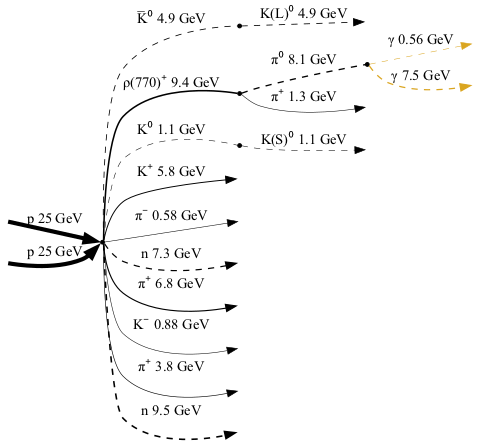

In [8]:
d = to_dot(hev)
d.graph_attr["size"] = "5,5"
d

Also important is the ability to save events and to pass them to other HEP software. The HepMC format is the common language in particle physics, which all tools understand. `pyhepmc` offers a Pythonic way to read/write events with an `open` function.

chromo events can be written to disk directly without manual conversion to HepMC3 format, because `pyhepmc` respects the following protocol. If a foreign event object has a method called `to_hepmc3`, it is called to convert the event automatically before writing.

In [9]:
import pyhepmc

with pyhepmc.open("pythia8.dat", "w") as f:
    f.write(event)  # both event and hev work here

The format is human-readable ASCII.

In [10]:
with open("pythia8.dat") as f:
    print(f.read())

HepMC::Version 3.02.05
HepMC::Asciiv3-START_EVENT_LISTING
T Pythia\|8.308\|
E 1 5 18
U GEV MM
P 1 0 2212 0.0000000000000000e+00 0.0000000000000000e+00 2.4982386783634187e+01 2.5000000000000000e+01 9.3827000000000005e-01 4
P 2 0 2212 0.0000000000000000e+00 0.0000000000000000e+00 -2.4982386783634187e+01 2.5000000000000000e+01 9.3827000000000005e-01 4
V -1 0 [1,2]
P 3 -1 321 9.0791284591124677e-02 1.9818281963726057e-02 -5.7780573872666237e+00 5.7998536994138137e+00 4.9368000000000001e-01 1
P 4 -1 -311 -3.2925844774734453e-02 -1.2334851177670630e-01 -4.8902331573374394e+00 4.9171429724825124e+00 4.9761000000000000e-01 2
P 5 -1 -211 -5.5741172271302986e-01 7.6213589745130428e-02 -5.0675366963227386e-02 5.8186262777102626e-01 1.3957000000000000e-01 1
P 6 -1 213 -1.0764516927511945e+00 -6.9096152804806066e-01 9.2335312392875224e+00 9.3575356452543197e+00 8.1804530756992100e-01 2
P 7 -1 2112 7.1958193166872256e-02 9.1600343309243937e-02 7.2737493138207494e+00 7.3351066433737717e+00 9.39570000

We can also handle incomplete records, like the one from SIBYLL-2.1.

In [11]:
evt_kin = CenterOfMass(20 * GeV, "p", "p")

model = im.Sibyll21(evt_kin, seed=1)

# generate one event
for event2 in model(1):
    pass

 |                                                  |
 |                 S I B Y L L  2.1                 |
 |                                                  |
 |         HADRONIC INTERACTION MONTE CARLO         |
 |                        BY                        |
 |                   Ralph ENGEL                    |
 |           R.S. FLETCHER, T.K. GAISSER            |
 |               P. LIPARI, T. STANEV               |
 |                                                  |
 | Publication to be cited when using this program: |
 | R. Engel et al., Proc. 26th ICRC, 1 (1999) 415   |
 |                                                  |
 | last modified:  28. Sept. 2001 by R. Engel       |


 Table: J, sqs,  PT_cut,  SIG_tot,  SIG_inel,  B_el,  rho,  <n_s>,  <n_h>
 ------------------------------------------------------------------------
    1   1.000E+01    1.45   38.33   30.88   10.83  -0.185   1.964   0.003
    1   1.259E+01    1.49   38.27   31.16   11.10  -0.127   1.949   0.006


Sibyll-2.1 does not include the beam particles in the output, so there is no common production vertex for all particles.

In [12]:
hev2 = event2.to_hepmc3()
hev2

<GenEvent momentum_unit=1, length_unit=0, event_number=0, particles=23, vertices=7, run_info=GenRunInfo(tools=[ToolInfo(name='SIBYLL', version='2.1', description='')], weight_names=[], attributes={})>

The serialized output is more compact. For SIBYLL-2.1, the vertex positions are all zero, and the HepMC3 format then optimizes the vertex entries away.

In [13]:
with pyhepmc.open("sibyll21.dat", "w") as f:
    f.write(event2)
    
with open("sibyll21.dat") as f:
    print(f.read())

HepMC::Version 3.02.05
HepMC::Asciiv3-START_EVENT_LISTING
T SIBYLL\|2.1\|
E 0 7 23
U GEV MM
P 1 0 -213 1.0322572290897369e-01 -1.6842520236968994e-01 2.8404159545898438e+00 2.9491136074066162e+00 7.6829999685287476e-01 2
P 2 0 213 -1.0322572290897369e-01 1.6842520236968994e-01 4.3120020627975464e-01 9.0290701389312744e-01 7.6829999685287476e-01 2
P 3 0 321 1.0131825208663940e+00 8.5414826869964600e-02 -7.5761926174163818e-01 1.3607025146484375e+00 4.9364998936653137e-01 1
P 4 0 -311 -3.9611405134201050e-01 2.4870738387107849e-02 -2.8219357132911682e-01 7.2723686695098877e-01 4.9766999483108521e-01 2
P 5 0 2112 4.2308215051889420e-02 -8.4946131706237793e-01 -6.5002994537353516e+00 6.6358594894409180e+00 9.3957000970840454e-01 1
P 6 0 2212 -7.8365129232406616e-01 3.5655328631401062e-01 4.8148379325866699e+00 4.9803872108459473e+00 9.3826997280120850e-01 1
P 7 0 -211 1.5685513615608215e-01 -2.1732920408248901e-01 -1.6795986890792847e-01 4.0313646197319031e-01 1.3956999778747559e-01 1
P 8 